In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix

Rental= pd.read_csv("./dataset/immo_data.csv")

get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
Rental.info()

In [ ]:
Rental.describe() #shows a summary of the numerical attributes


In [3]:
Berlin=Rental.loc[Rental["regio2"]=='Berlin']



In [ ]:
Berlin.shape

In [4]:
corr_matrix = Berlin.corr()
corr_matrix["totalRent"].sort_values(ascending=False)


totalRent                   1.000000
baseRent                    0.876431
livingSpace                 0.747748
serviceCharge               0.701983
baseRentRange               0.630741
livingSpaceRange            0.629388
noRoomsRange                0.517548
heatingCosts                0.439351
noRooms                     0.415801
picturecount                0.297007
hasKitchen                  0.220137
lift                        0.197116
yearConstructedRange        0.179634
balcony                     0.145889
cellar                      0.105148
newlyConst                  0.097460
garden                      0.097199
floor                       0.068278
yearConstructed             0.066111
numberOfFloors              0.041601
lastRefurbish               0.034407
pricetrend                  0.015857
electricityBasePrice        0.006113
electricityKwhPrice        -0.006113
scoutId                    -0.025795
noParkSpaces               -0.038506
telekomUploadSpeed         -0.062011
t

In [ ]:
attributes = ["baseRent","totalRent","livingSpace", "serviceCharge", "noRooms","heatingCosts","picturecount"]
scatter_matrix(Berlin[attributes], figsize=(16, 12))
scatter_matrix


In [ ]:
Berlin["totalRent"].describe()


Text(0, 0.5, 'Count')

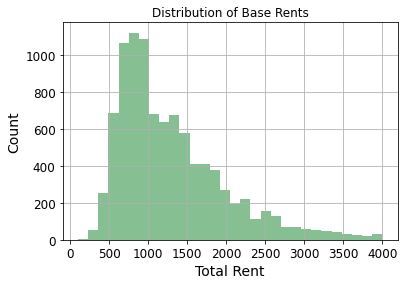

In [5]:
Berlin['totalRent'].hist(bins=30, range=(100,4000), grid=True, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Total Rent')
plt.ylabel('Count')


In [ ]:
Berlin.plot(kind="scatter", x="livingSpace", y="totalRent", alpha=0.1)


In [ ]:
Berlin.plot(kind="scatter", x="yearConstructed", y="totalRent", alpha=0.1)

In [6]:
m=Berlin.groupby(['regio3'])['baseRent'].mean()
m.sort_values()


regio3
Marzahn_Marzahn                           500.651438
Hellersdorf_Hellersdorf                   546.908897
Haselhorst_Spandau                        608.990000
Staaken_Spandau                           610.255091
Neu_Hohenschönhausen_Hohenschönhausen     612.841250
                                            ...     
Rummelsburg_Lichtenberg                  1776.020000
Dahlem_Zehlendorf                        1808.883448
Gatow_Spandau                            1825.090000
Mitte_Mitte                              1896.462699
Grunewald_Wilmersdorf                    2449.683763
Name: baseRent, Length: 79, dtype: float64

In [7]:
#droping initial columns
cols_to_drop = ["telekomHybridUploadSpeed", "picturecount", "telekomUploadSpeed",
                "geo_bln", "houseNumber", "geo_krs", "geo_plz", "regio3", "description",
                "facilities"]

Berlin = Berlin.drop(cols_to_drop, axis=1)

#Columns with several NULL entries are dropped too.

Berlin.isna().sum()

#filter columns for berlin
Berlin = Berlin[Berlin["regio2"]=="Berlin"]

#sorting and re_indexing regarding to the price
Berlin = Berlin.sort_values(by=['totalRent'])
Berlin = Berlin.reset_index(drop=True)

#filter some columns between specific amount of values
Berlin = Berlin.query("totalRent >= 100").query("totalRent<10000")
Berlin = Berlin.query("baseRent >= 100").query("baseRent<10000")
Berlin = Berlin.query("livingSpace >= 10").query("livingSpace<400")
Berlin = Berlin.query("noRooms >= 0").query("noRooms<15")




# Replacing columns with f/t with 0/1
Berlin.replace({False: 0, True: 1}, inplace=True)


In [8]:
#make a single binary variable to indicate if the apartment is refurbished/new
Berlin['refurbished'] = (Berlin.condition == 'refurbished') | (Berlin.condition == 'first_time_use') | (Berlin.condition == 'mint_condition') | (Berlin.condition == 'fully_renovated') | (Berlin.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the rental property has good interior
Berlin['greatInterior'] = (Berlin.interiorQual == 'sophisticated') | (Berlin.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
Berlin['goodHeating'] = (Berlin.heatingType == 'central_heating') | (Berlin.heatingType == 'floor_heating') | (Berlin.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
Berlin['2018_ads'] = (Berlin.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
Berlin['logRent'] = np.log(Berlin['totalRent'])


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

# regression Models

## 1. Linear Regression model

In [18]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

linear_regressor = LinearRegression()
#linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))
linear_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

#y_pred_rfr = linear_regressor.predict(X_test)
#linear_mse = mean_squared_error(y_test, y_pred_rfr)
#print('MSE:', linear_mse)
#print('MSE:', mean_squared_error(y_test, y_pred_rfr))             

y_predict = linear_regressor.predict(X_train.reshape(-1, 1))


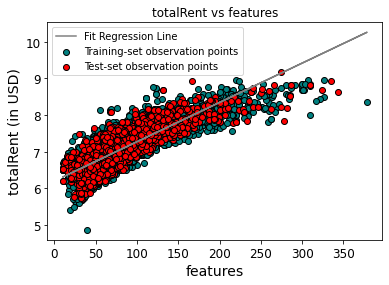

In [19]:
# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train, y_predict, color='grey', label='Fit Regression Line')
plt.title('totalRent vs features')
plt.xlabel('features')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

## 2. Decision Tree model

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,3].values
y = Berlin[y_var].values
X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772, 11)
(1943, 11)
(7772, 1)
(1943, 1)


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_scores = cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_mean_squared_error", cv=10)

y_pred = tree_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred)
print('MSE:', linear_mse)

tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

MSE: 0.08586456225137724


array([0.31169707, 0.30887529, 0.28335299, 0.30177951, 0.3080291 ,
       0.2997636 , 0.30224549, 0.28541022, 0.31293485, 0.31577175])

In [22]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.31169707 0.30887529 0.28335299 0.30177951 0.3080291  0.2997636
 0.30224549 0.28541022 0.31293485 0.31577175]
Mean: 0.30298598530219956
Standard deviation: 0.010512872808225278


In [23]:
from sklearn.linear_model import LinearRegression

lin_scores = cross_val_score(tree_reg, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.30030266 0.27312316 0.29815747 0.31318773 0.33027719 0.31299137
 0.31711816 0.32824841 0.29864326 0.32006351]
Mean: 0.30921129183057755
Standard deviation: 0.016223936304077


## 3. Random forest model

In [24]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 'baseRent',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [25]:
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
prediction = forest_reg.predict(X_test)
forest_mse21 = mean_squared_error(y_test, prediction)
forest_rmse21 = np.sqrt(forest_mse21)
print("rmse:", forest_rmse21)
print("mse:", forest_mse21)

rmse: 0.0554748862813094
mse: 0.0030774630079242102


In [26]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.05748151 0.06120194 0.05265691 0.0645088  0.049479   0.05751988
 0.06131949 0.05807495 0.05504255 0.06010139]
Mean: 0.05773864191633016
Standard deviation: 0.004216351578408959


In [27]:

scores = cross_val_score(forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.057798
std       0.004499
min       0.049239
25%       0.055768
50%       0.057917
75%       0.060927
max       0.064198
dtype: float64

### Fine tunning Random forest Regressor(Grid Search)

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg3 = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg3, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [30]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [31]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1128166237654094 {'max_features': 2, 'n_estimators': 3}
0.09493415318424103 {'max_features': 2, 'n_estimators': 10}
0.08678893731503698 {'max_features': 2, 'n_estimators': 30}
0.08206410225584851 {'max_features': 4, 'n_estimators': 3}
0.0709797029762114 {'max_features': 4, 'n_estimators': 10}
0.06705661204354789 {'max_features': 4, 'n_estimators': 30}
0.07622299781977508 {'max_features': 6, 'n_estimators': 3}
0.06545904156302824 {'max_features': 6, 'n_estimators': 10}
0.062278754250494055 {'max_features': 6, 'n_estimators': 30}
0.07148594658424003 {'max_features': 11, 'n_estimators': 3}
0.0639890031163434 {'max_features': 11, 'n_estimators': 10}
0.06253444893034504 {'max_features': 11, 'n_estimators': 30}
0.11233599015231142 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.09402895889058918 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.0917567067136547 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.07922195962249261 {'bootstrap': False, 'max_

### fine tunning Random forest regressor(RandomizedSearch)

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg1 = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3d2d0f6970>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3d2d0ddf40>},
                   scoring='neg_mean_squared_error')

In [33]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 192}

In [34]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=192)

In [35]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.06090042109620067 {'max_features': 6, 'n_estimators': 86}
0.18557445548690873 {'max_features': 1, 'n_estimators': 1}
0.07002326821622025 {'max_features': 6, 'n_estimators': 4}
0.06087633050358341 {'max_features': 7, 'n_estimators': 42}
0.06480850765490628 {'max_features': 4, 'n_estimators': 160}
0.06931572566415653 {'max_features': 4, 'n_estimators': 15}
0.10094950127046466 {'max_features': 1, 'n_estimators': 78}
0.06056246497426685 {'max_features': 7, 'n_estimators': 192}
0.08459740524607047 {'max_features': 2, 'n_estimators': 138}
0.06155323450094875 {'max_features': 5, 'n_estimators': 71}


In [36]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([9.05493302e-04, 3.77080283e-03, 6.32594850e-04, 2.01598769e-01,
       6.49643415e-02, 4.75668050e-04, 7.13233238e-01, 1.67551500e-03,
       9.34727306e-03, 3.87907404e-04, 4.49193563e-04, 2.55920325e-03])

In [37]:
final_model = rnd_search.best_estimator_

#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse0 = mean_squared_error(y_test, final_predictions)
final_rmse0 = np.sqrt(final_mse0)
print("rmse:", final_rmse0)
print("mse:", final_mse0)

rmse: 0.053268610670211436
mse: 0.002837544882734564


In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772, 1)
(1943, 1)
(7772,)
(1943,)


In [39]:
from sklearn.ensemble import RandomForestRegressor
"""forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 1111,
                                         max_depth=30, max_features=6, min_samples_leaf=10)"""

forest_regressor = RandomForestRegressor(n_estimators = 192, random_state = 42)
forest_regressor.fit(X_train, y_train)


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

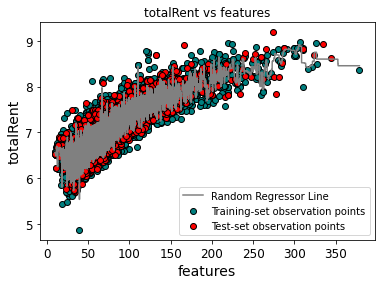

In [40]:

# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_grid, forest_regressor.predict(X_grid), color='grey', label='Random Regressor Line')
plt.title('totalRent vs features')
plt.xlabel('features')
plt.ylabel('totalRent')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

## 4. GradientBoosting 

In [41]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_train, y_train)
housing_predictions = grad_reg.predict(X_test)
grad_mse12 = mean_squared_error(y_test, housing_predictions)
grad_rmse12 = np.sqrt(grad_mse12)
print("final_rmse:", grad_rmse12)
print("final_mse:", grad_mse12)

final_rmse: 0.22775960855845861
final_mse: 0.05187443929070229


In [43]:
from sklearn.model_selection import cross_val_score

grad_scores = cross_val_score(grad_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
grad_rmse_scores = np.sqrt(-grad_scores)
display_scores(grad_rmse_scores)

Scores: [0.23240725 0.22952003 0.21846255 0.22869954 0.21462555 0.22842975
 0.22126938 0.21611344 0.22502803 0.23757788]
Mean: 0.2252133403052885
Standard deviation: 0.007083449614905514


In [44]:
scores = cross_val_score(grad_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.225218
std       0.007470
min       0.214626
25%       0.219164
50%       0.226729
75%       0.229319
max       0.237578
dtype: float64

### fine tunning gradientBoosting(Gridsearch)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

gradientBoosting_reg = GradientBoostingRegressor()

gradientBoosting_search = GridSearchCV(gradientBoosting_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
gradientBoosting_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [46]:
gradientBoosting_search.best_params_


{'max_features': 11, 'n_estimators': 30}

In [47]:
gradientBoosting_search.best_estimator_


GradientBoostingRegressor(max_features=11, n_estimators=30)

In [48]:
cvres = gradientBoosting_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.467567535561408 {'max_features': 2, 'n_estimators': 3}
0.36085022572732484 {'max_features': 2, 'n_estimators': 10}
0.2716405023769791 {'max_features': 2, 'n_estimators': 30}
0.4502478571046403 {'max_features': 4, 'n_estimators': 3}
0.33054836927868153 {'max_features': 4, 'n_estimators': 10}
0.24291623798917225 {'max_features': 4, 'n_estimators': 30}
0.43868930707174525 {'max_features': 6, 'n_estimators': 3}
0.3178564170824705 {'max_features': 6, 'n_estimators': 10}
0.23817570244869268 {'max_features': 6, 'n_estimators': 30}
0.4315272796496659 {'max_features': 11, 'n_estimators': 3}
0.30568569914881055 {'max_features': 11, 'n_estimators': 10}
0.23435032792255397 {'max_features': 11, 'n_estimators': 30}
0.46917821079687017 {'max_features': 2, 'n_estimators': 3}
0.35784658318853324 {'max_features': 2, 'n_estimators': 10}
0.45378587150222804 {'max_features': 3, 'n_estimators': 3}
0.34097210211838247 {'max_features': 3, 'n_estimators': 10}
0.44680618440630615 {'max_features': 4, 'n_estima

### fine tunning GradientBoosting (RandomizedSearch)

In [49]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

gradientBoost_reg1 = GradientBoostingRegressor()
gradientBoost_search = RandomizedSearchCV(gradientBoost_reg1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
gradientBoost_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3d2d3a23d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3d2d38ea30>},
                   scoring='neg_mean_squared_error')

In [50]:
gradientBoost_search.best_params_

{'max_features': 4, 'n_estimators': 190}

In [51]:
gradientBoost_search.best_estimator_

GradientBoostingRegressor(max_features=4, n_estimators=190)

In [52]:
cvres = gradientBoost_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.24025131718888176 {'max_features': 1, 'n_estimators': 146}
0.39247548167591456 {'max_features': 6, 'n_estimators': 5}
0.23872973442099946 {'max_features': 6, 'n_estimators': 29}
0.3939365647129569 {'max_features': 3, 'n_estimators': 6}
0.22481006561173714 {'max_features': 4, 'n_estimators': 190}
0.2274002160889262 {'max_features': 7, 'n_estimators': 69}
0.22495145236359343 {'max_features': 4, 'n_estimators': 185}
0.23952547510194566 {'max_features': 3, 'n_estimators': 45}
0.239742657113352 {'max_features': 3, 'n_estimators': 46}
0.34546779469614813 {'max_features': 1, 'n_estimators': 21}


In [53]:
feature_boost_importances = gradientBoost_search.best_estimator_.feature_importances_
feature_boost_importances

array([0.01109987, 0.04507954, 0.00235001, 0.6451195 , 0.16687299,
       0.00235968, 0.04329561, 0.0484116 , 0.0119383 , 0.0009227 ,
       0.02255019])

In [54]:
final_model1 = gradientBoost_search.best_estimator_
#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model1.predict(X_test)

final_mse2 = mean_squared_error(y_test, final_predictions)
final_rmse2 = np.sqrt(final_mse2)
print("final_rmse:", final_rmse2)
print("final_mse:", final_mse2)

final_rmse: 0.22642388815467274
final_mse: 0.05126777712707975


In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
"""forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 1111,
                                         max_depth=30, max_features=6, min_samples_leaf=10)"""

gradient_regressor = GradientBoostingRegressor(n_estimators = 190, random_state =42)
gradient_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

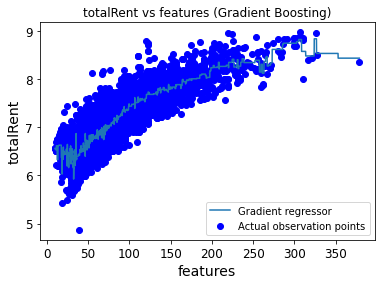

In [57]:
plt.scatter(X_train, y_train, color='blue', label='Actual observation points')
plt.plot(X_grid, gradient_regressor.predict(X_grid), label='Gradient regressor')
plt.title('totalRent vs features (Gradient Boosting)')
plt.xlabel('features')
plt.ylabel('totalRent')

plt.legend()
plt.show()